In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [5]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train[train['target']==0].head(10)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [8]:
train[train['target']==1].head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [9]:
train.shape

(7613, 5)

In [10]:
test.shape

(3263, 4)

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

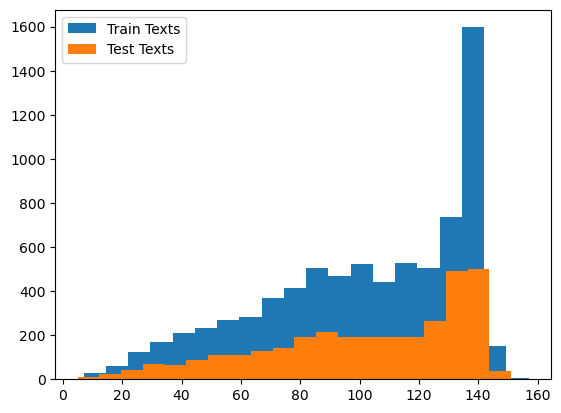

In [12]:
length_train_dataset = train['text'].str.len()
length_test_dataset = test['text'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train Texts")
plt.hist(length_test_dataset, bins=20,label="Test Texts")
plt.legend()
plt.show()

In [13]:
combine=train.append(test,ignore_index=True)
combine.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_14104\1715531792.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True)


(10876, 5)

In [14]:
combine.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0


In [15]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern, input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text    

### Removing Twitter Handles

In [16]:
combine['tidy_text']=np.vectorize(remove_pattern)(combine['text'],"@[\w]*")
combine.head()

,id,keyword,location,text,target,tidy_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,"13,000 people receive #wildfires evacuation orders in California"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


In [17]:
combine['tidy_text']=combine['tidy_text'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14104\2181329805.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_text']=combine['tidy_text'].str.replace("[^a-zA-Z#]"," ")


,id,keyword,location,text,target,tidy_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,people receive #wildfires evacuation orders in California
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1.0,#RockyFire Update California Hwy closed in both directions due to Lake County fire #CAfire #wildfires
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1.0,#flood #disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1.0,I m on top of the hill and I can see a fire in the woods
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1.0,There s an emergency evacuation happening now in the building across the street
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1.0,I m afraid that the tornado is coming to our area


### Removing short words(a,is,so, etc..) 

In [18]:
combine['tidy_text']=combine['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [19]:
combine.head()

,id,keyword,location,text,target,tidy_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Deeds Reason this #earthquake ALLAH Forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,residents asked shelter place being notified officers other evacuation shelter place orders expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,people receive #wildfires evacuation orders California
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just sent this photo from Ruby #Alaska smoke from #wildfires pours into school


In [20]:
tokenized_text=combine['tidy_text'].apply(lambda x:x.split())
tokenized_text.head()

0                                                                    [Deeds, Reason, this, #earthquake, ALLAH, Forgive]
1                                                                             [Forest, fire, near, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, being, notified, officers, other, evacuation, shelter, place, orders, expected]
3                                                         [people, receive, #wildfires, evacuation, orders, California]
4                          [Just, sent, this, photo, from, Ruby, #Alaska, smoke, from, #wildfires, pours, into, school]
Name: tidy_text, dtype: object

In [21]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_text=tokenized_text.apply(lambda x:[stemmer.stem(i) for i in x])

In [22]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
combine['tidy_text'] = tokenized_text

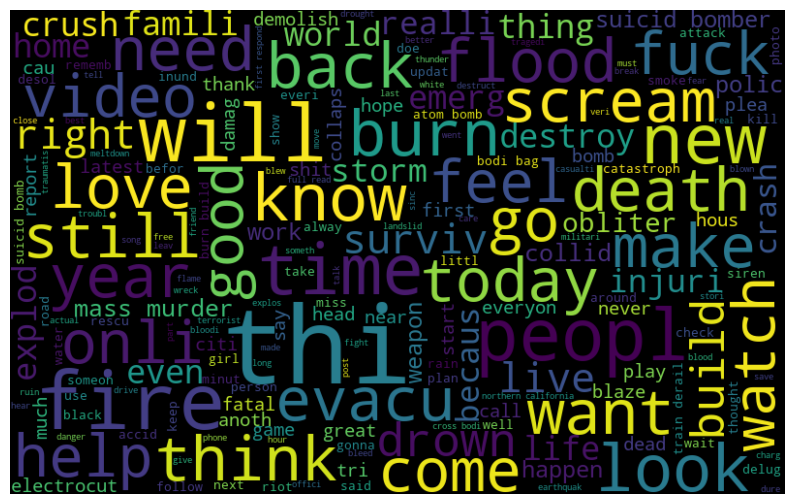

In [23]:
all_words = ' '.join([text for text in combine['tidy_text']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Seperate Clouds 

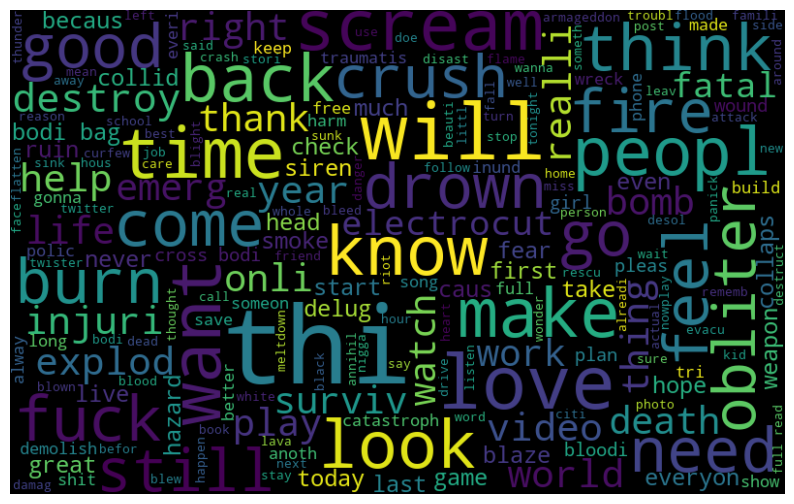

In [24]:
normal_words= ' '.join([text for text in combine['tidy_text'][combine['target']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

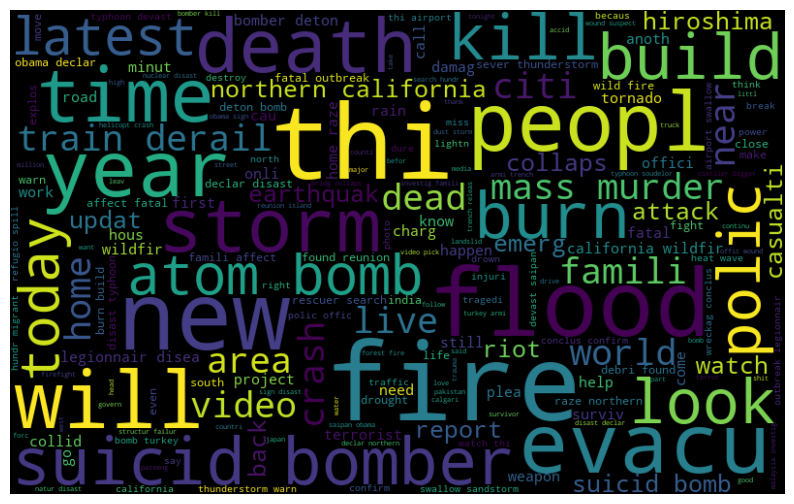

In [25]:
disaster_words= ' '.join([text for text in combine['tidy_text'][combine['target']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(disaster_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Hashtags 

In [26]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [27]:
ht_regular = hashtag_extract(combine['tidy_text'][combine['target']==0])
ht_disaster=hashtag_extract(combine['tidy_text'][combine['target']==1])
ht_regular = sum(ht_regular,[])
ht_disaster = sum(ht_disaster,[])

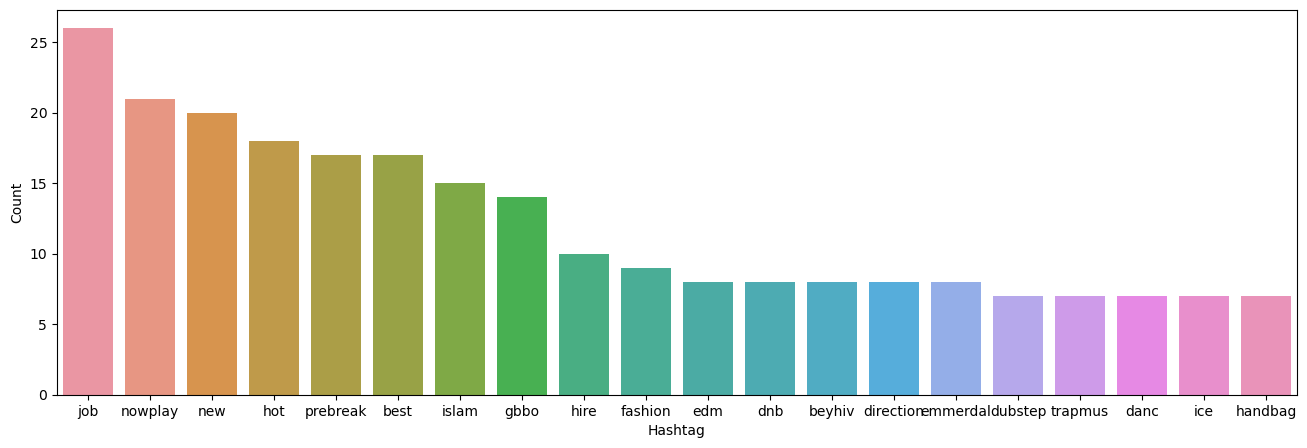

In [28]:
regular_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(regular_tweets.keys()),'Count':list(regular_tweets.values())})
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

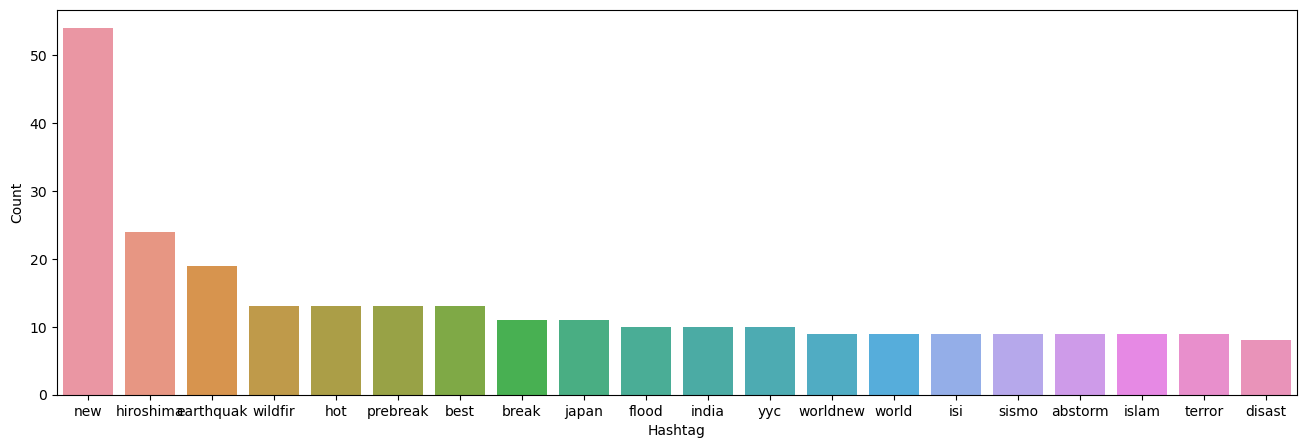

In [29]:
disaster_tweets = nltk.FreqDist(ht_disaster)
df2 = pd.DataFrame({'Hashtag': list(disaster_tweets.keys()),'Count': list(disaster_tweets.values())})
df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

### Assorted Techniques like Bag Of Words,TF-IDF for converting data into features 

In [30]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [32]:
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_text'])
bow.shape

(10876, 1000)

In [33]:
combine=combine.fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['target'],
                                                    test_size=0.2, random_state=69)

In [34]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (8700, 1000)
X_test_shape :  (2176, 1000)
y_train_shape :  (8700,)
y_test_shape :  (2176,)


### Multinomial Naive Bayes Classifier 

In [35]:
from sklearn.naive_bayes import MultinomialNB
model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

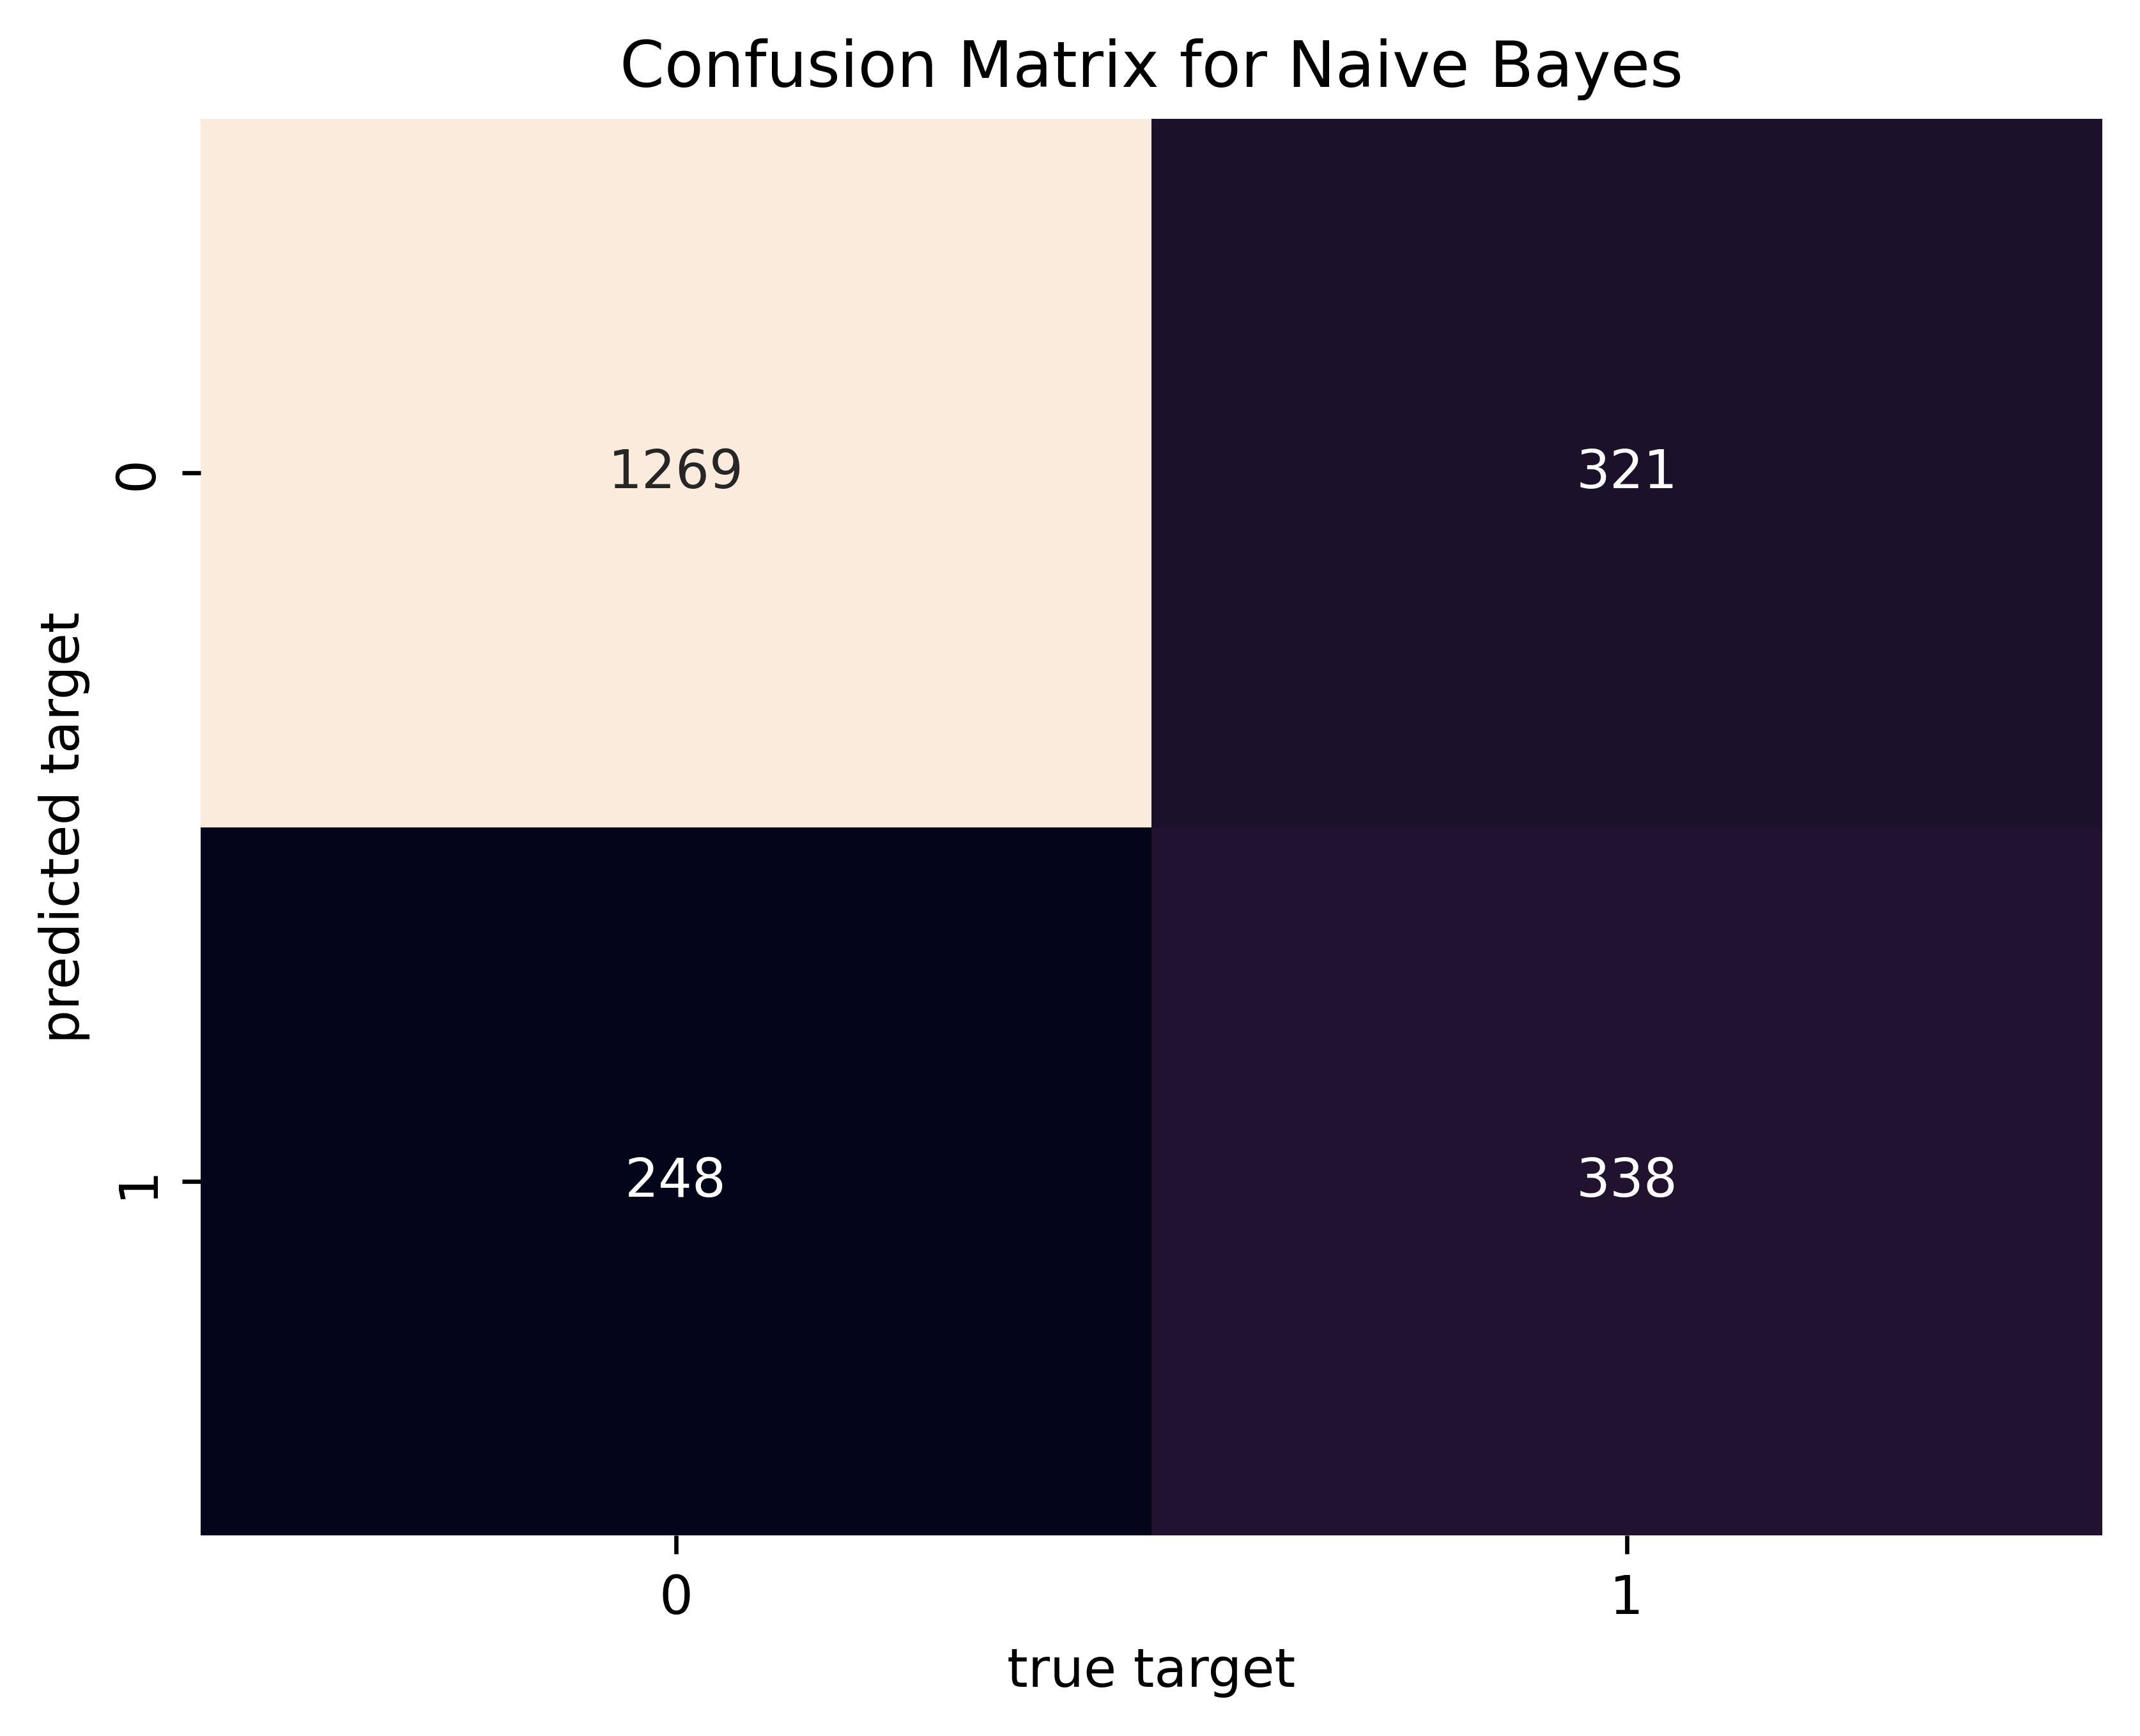

In [36]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true target')
plt.ylabel('predicted target')
plt.savefig("confusion_matrix.png")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7385110294117647


In [41]:
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1517
         1.0       0.58      0.51      0.54       659

    accuracy                           0.74      2176
   macro avg       0.69      0.67      0.68      2176
weighted avg       0.73      0.74      0.73      2176



In [42]:
import numpy as np
from sklearn.metrics import matthews_corrcoef

In [43]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_test, predicted_naive)

0.3619371180935309

In [45]:
from sklearn.metrics import roc_auc_score

In [49]:
roc = roc_auc_score(y_test, predicted_naive)
print('ROC: %.3f' % roc)

ROC: 0.675
